In [1]:
from Quadtree import *
import random
N = 100
r = Rectangle(0,0,N,N)
qt = QuadTree(r, 4)
for i in range(30):
    x = random.randint(0, N )
    y = random.randint(0, N )
    p = Point(x,y)
    qt.insert(p)


# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111, aspect='equal')
# lims = (0, 100)
# for p in points:
#     print(p.x,p.y)
#     ax1.scatter(p.x,p.y, color = "g")

# qt.show()
# # ax1.add_patch(patches.Rectangle((1, 1), width, height,fill=False))
# plt.ylim(lims)
# plt.xlim(lims)

# plt.show()

2


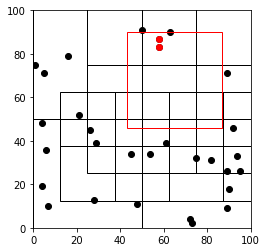

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x = random.randint(0, N-25 )
# x = 25
y = random.randint(0, N-25 )
# y = 19
h = 22
w = 22
query_box = Rectangle(x, y, w, h);

points = qt.query(query_box)
print(len(points))
# print(len(points))
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111, aspect='equal')
lims = (0, N)
ax1 = qt.show()
# print(x,y,w,h)
for p in points:
    ax1.scatter(p.x,p.y, color = "r")
ax1.add_patch(patches.Rectangle((x-w, y-h), 2*w, 2*h,fill=False, color="r"))
plt.ylim(lims)
plt.xlim(lims)
plt.show()

In [3]:
import numpy as np
def split_rec(rec, n = 3):
    x = rec.x
    y = rec.y
    w = rec.w
    h = rec.h
    new_w = w/n
    new_h = h/n
    xs = np.linspace(x-2*new_w,x+2*new_w,n)
    ys = np.linspace(y-2*new_h,y+2*new_h,n)
    rect_list = []
#     print(xs[1])
    for i in range(n):
        for j in range(n):
            rect = Rectangle(xs[i],ys[j],new_w,new_h)
            rect_list.append(rect)
            
    return rect_list


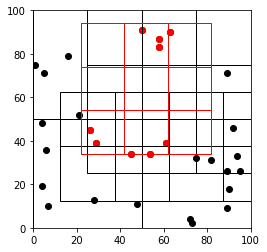

In [4]:
# x = random.randint(0, 100 )
# y = random.randint(0, 100 )
x,y = 52,64
query_box = Rectangle(x, y, 30, 30);    
rec_list = split_rec(query_box, 3)


def show_rect(rec, ax = None):
    x = rec.x
    y = rec.y
    w = rec.w
    h = rec.h
    ax.add_patch(patches.Rectangle((x-w, y-h), 2*w, 2*h,fill=False, \
                                    color="r"))

lims = (0, N)
ax1 = qt.show()
# print(x,y,w,h)
# for p in points:
#     ax1.scatter(p.x,p.y, color = "r")
for q in rec_list:
    points = qt.query(q)
    for p in points:
        ax1.scatter(p.x,p.y, color = "r")
    show_rect(q, ax1)
# show_rect(rec_list[0], ax1)
# show_rect(rec_list[4], ax1)
# show_rect(query_box,ax1)
plt.ylim(lims)
plt.xlim(lims)
plt.show()

In [5]:
from pyspark.context import SparkContext,SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import broadcast
# from pyspark import SparkContext, 

# conf = SparkConf().setAppName("assignment")
# sc = SparkContext(conf=conf)
sc = SparkContext(master = 'local[9]', appName = 'test')

In [6]:
def parallel_query(qt,query_box):
    #bc qt
    bc_qt = sc.broadcast(qt)
    
    #parallelize query
    query_list = split_rec(query_box, 3)
    rdd_query = sc.parallelize(query_list)
    
    #map query
    def query(query_box):
        from Quadtree import Rectangle, QuadTree, Point
        points = bc_qt.value.query(query_box)
        return points
    
    result = rdd_query.map(query)
    return result.collect()
result = parallel_query(qt,query_box)
# print(query_box.x,query_box.y)
# print(result)

In [9]:
import time

N = 20000
r = Rectangle(0,0,N,N)
qt = QuadTree(r, 4)
for i in range(10000):
    x = random.randint(0, N )
    y = random.randint(0, N )
    p = Point(x,y)
    qt.insert(p)


In [8]:
x = random.randint(0, N-25 )
# x = 25
y = random.randint(0, N-25 )
# y = 19
h = N/4
w = N/4
query_box = Rectangle(x, y, w, h);
start = time.time()
points = qt.query(query_box)
end = time.time()
result_time = end - start
print(len(points))
print(result_time)
# for p in points:
#     print(p.x,p.y)

KeyboardInterrupt: 

In [ ]:
start = time.time()
points = parallel_query(qt,query_box)
end = time.time()
result_time = end - start
total = 0
for ps in points:
    total += len(ps)
#     for p in ps:
#         print(p.x,p.y)
#     print()
print(total)
print(result_time)

In [ ]:
import matplotlib.pyplot as plt

plt.bar(["non parallel","parallel"],[42.035,5.05244])
# plt.legend()
# plt.yscale("log")
plt.title('Parallel quadtree default parameter')
plt.ylabel('Time execution')
plt.show()


In [19]:
#field size

field_sizes = np.linspace(1000,20000, 21)
# print(field_sizes)
 
def measure_time_non(N):
    r = Rectangle(0,0,N,N)
    qt = QuadTree(r, 4)
    for i in range(10000):
        x = random.randint(0, N )
        y = random.randint(0, N )
        p = Point(x,y)
        qt.insert(p)

    x = random.randint(0, N )
    y = random.randint(0, N )
    h = N/4
    w = N/4
    query_box = Rectangle(x, y, w, h);
    start = time.time()
    points = qt.query(query_box)
    end = time.time()
    result_time_non = end - start
    
    start = time.time()
    points = parallel_query(qt, query_box)
    end = time.time()
    result_time_parallel = end - start
    
    return result_time_non, result_time_parallel

results_non = []
results_par = []
for field in field_sizes:
    result_non,result_par = measure_time_non(field)
    results_non.append(result_non)
    print(result_non)
    results_par.append(result_par)
    print(result_par)
    print(field,"done")

print("all done")

330.5953483581543
8.02959394454956
1000.0 done
38.61006999015808
8.241374254226685
1950.0 done
24.16363286972046
8.041430234909058
2900.0 done
94.36006021499634
7.748502016067505
3850.0 done
192.7554953098297
7.743069171905518
4800.0 done
14.612730741500854
6.865519046783447
5750.0 done
139.07845950126648
7.6187522411346436
6700.0 done
338.77227687835693
8.948938369750977
7650.0 done
145.9539201259613
8.903732776641846
8600.0 done
366.3046827316284
6.72364068031311
9550.0 done
54.26737880706787
6.338974237442017
10500.0 done
139.57469987869263
6.939164638519287
11450.0 done
41.51088237762451
6.508997917175293
12400.0 done
81.34548473358154
6.407206773757935
13350.0 done
26.47062087059021
6.682270288467407
14300.0 done
55.31158757209778
7.215219736099243
15250.0 done
307.3505434989929
7.579837083816528
16200.0 done
140.301598072052
7.40073037147522
17150.0 done
261.28767371177673
7.493798017501831
18100.0 done
32.669249057769775
6.950530052185059
19050.0 done
348.12051606178284
7.408575

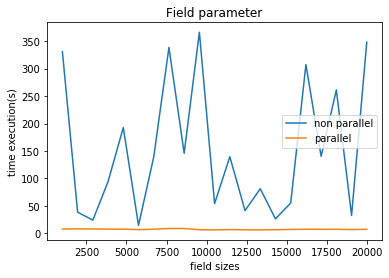

In [21]:
plt.plot(field_sizes,results_non, label="non parallel")
plt.plot(field_sizes,results_par, label="parallel")
plt.legend()
# plt.yscale("log")
plt.title('Field parameter')
plt.ylabel('time execution(s)')
plt.xlabel('field sizes')
plt.show()


In [38]:
#dense size

dense_sizes = np.linspace(10,8000, 11,dtype = "i")
# print(field_sizes)
 
def measure_time(dense):
    N = 20000
    r = Rectangle(0,0,N,N)
    qt = QuadTree(r, 4)
    for i in range(dense):
        x = random.randint(0, N )
        y = random.randint(0, N )
        p = Point(x,y)
        qt.insert(p)

    x = random.randint(0, N )
    y = random.randint(0, N )
    h = N/4
    w = N/4
    query_box = Rectangle(x, y, w, h);
    start = time.time()
    points = qt.query(query_box)
    end = time.time()
    result_time_non = end - start
    
    start = time.time()
    points = parallel_query(qt, query_box)
    end = time.time()
    result_time_parallel = end - start
    
    return result_time_non, result_time_parallel

results_non = []
results_par = []
for field in dense_sizes:
    result_non,result_par = measure_time(field)
    results_non.append(result_non)
    print(result_non)
    results_par.append(result_par)
    print(result_par)
    print(field,"done")

print("all done")

0.0
6.359478712081909
10 done
0.06383252143859863
6.582061052322388
809 done
0.3372499942779541
6.390833616256714
1608 done
1.4478564262390137
6.854432821273804
2407 done
1.5826513767242432
7.588452577590942
3206 done
5.807844638824463
6.721503734588623
4005 done
4.705746650695801
6.428231954574585
4804 done
10.60403037071228
7.580533504486084
5603 done
77.80884289741516
7.788207530975342
6402 done
44.78819727897644
7.714215278625488
7201 done
170.51960134506226
8.69188380241394
8000 done
all done


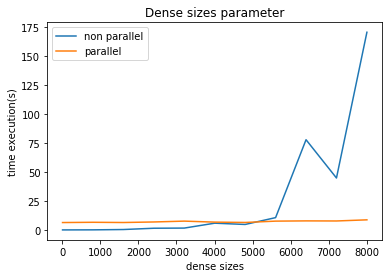

In [39]:
# dense_sizes = np.linspace(10,20000, 11,dtype = "i")
# dense_sizes = dense_sizes[:6]
# results_non = [0,4.554527044,6.792114496,78.87204289,372.2041707,492.8731201]
# results_par = [11.25275517,11.90786219,11.01060939,11.09887719,11.97464252,11.72529912]
plt.plot(dense_sizes,results_non, label="non parallel")
plt.plot(dense_sizes,results_par, label="parallel")
plt.legend()
# plt.yscale("log")
plt.title('Dense sizes parameter')
plt.ylabel('time execution(s)')
plt.xlabel('dense sizes')
plt.show()


In [41]:
#box query size

box_sizes = np.linspace(1,30, 11)
# print(field_sizes)
 
def measure_time(box):
    N = 20000
    r = Rectangle(0,0,N,N)
    qt = QuadTree(r, 4)
    for i in range(10000):
        x = random.randint(0, N )
        y = random.randint(0, N )
        p = Point(x,y)
        qt.insert(p)
#     print(N)
    x = random.randint(0, N )
    y = random.randint(0, N )
    h = N*box/100
    w = N*box/100
    query_box = Rectangle(x, y, w, h);
    start = time.time()
    points = qt.query(query_box)
    end = time.time()
    result_time_non = end - start
    
    start = time.time()
    points = parallel_query(qt, query_box)
    end = time.time()
    result_time_parallel = end - start
    
    return result_time_non, result_time_parallel

results_non = []
results_par = []
for field in box_sizes:
    result_non,result_par = measure_time(field)
    results_non.append(result_non)
    print(result_non)
    results_par.append(result_par)
    print(result_par)
    print(field,"done")

print("all done")

0.0
7.802143573760986
1.0 done
0.001994609832763672
6.9044201374053955
3.9 done
0.04587888717651367
6.535950660705566
6.8 done
1.0016839504241943
6.540375232696533
9.7 done
4.221004486083984
6.5194244384765625
12.6 done
18.85640239715576
6.556508779525757
15.5 done
9.654217004776001
6.776410102844238
18.4 done
102.20491909980774
6.968346834182739
21.3 done
339.45820331573486
8.945115804672241
24.2 done
41.86030650138855
8.471843004226685
27.099999999999998 done
66.63068509101868
8.712417602539062
30.0 done
all done


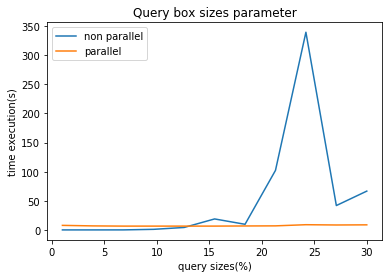

In [43]:
plt.plot(box_sizes,results_non, label="non parallel")
plt.plot(box_sizes,results_par, label="parallel")
plt.legend()
# plt.yscale("log")
plt.title('Query box sizes parameter')
plt.ylabel('time execution(s)')
plt.xlabel('query sizes(%)')
plt.show()
